Plot accuracy vs number of boosting iterations (number of layers). Kinda like this

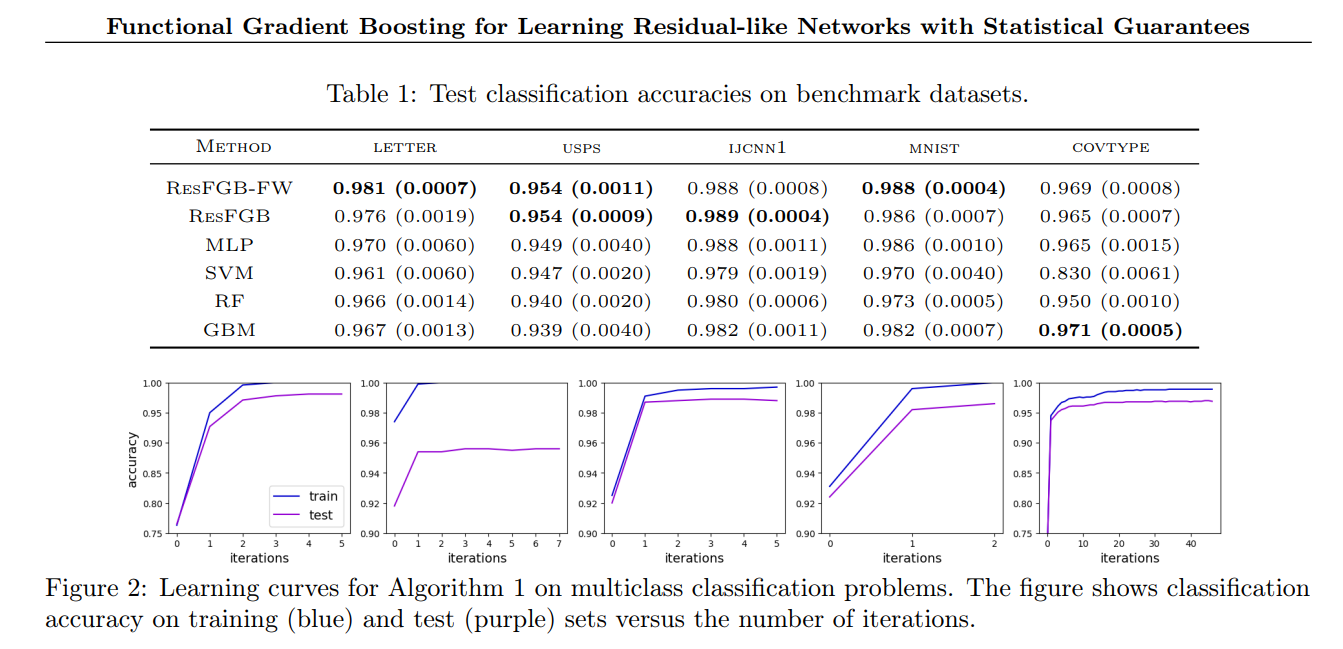

# NO ---- I WANT REGRESSION

* Browse here https://archive.ics.uci.edu/datasets?Task=Regression&skip=50&take=10&sort=desc&orderBy=NumHits&search=

---------------------------------------------

Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s. https://archive.ics.uci.edu/dataset/203/yearpredictionmsd 

Additional Information

You should respect the following train / test split:

train: first 463,715 examples

test: last 51,630 examples

It avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set.

* 500k rows
* 90 features (all cont?), 
* target = year of song (1922 to 2011)

---------------------------------------------

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests. https://archive.ics.uci.edu/dataset/186/wine+quality

Additional Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

* 6497 rows
* 11 real features
* 1 binary (red vs white wine)
* target=quality score (0 to 10)



---------------------------------------------

Predict the age of abalone from physical measurements. https://archive.ics.uci.edu/dataset/1/abalone

Additional Information

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

* 4117 rows, 7 cont features, 1 categorical (M, F, Infant sex), target=number of rings



---------------------------------------------

This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data. https://archive.ics.uci.edu/dataset/162/forest+fires

Additional Information

In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function.
   Then, several Data Mining methods were applied. After fitting the models, the outputs were
   post-processed with the inverse of the ln(x+1) transform. Four different input setups were
   used. The experiments were conducted using a 10-fold (cross-validation) x 30 runs. Two
   regression metrics were measured: MAD and RMSE. A Gaussian support vector machine (SVM) fed
   with only 4 direct weather conditions (temp, RH, wind and rain) obtained the best MAD value:
   12.71 +- 0.01 (mean and confidence interval within 95% using a t-student distribution). The
   best RMSE was attained by the naive mean predictor. An analysis to the regression error curve
   (REC) shows that the SVM model predicts more examples within a lower admitted error. In effect,
   the SVM model predicts better small fires, which are the majority. 

* 517 rows
* 10 real features
* 2 categorical (month, day, but i can maybe treat these as ints)
* target=area m^2 burnt



In [ ]:
from typing import Tuple, List, Union, Any, Optional, Dict, Literal, Callable, Type
import argparse

from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from ucimlrepo import fetch_ucirepo 
import pandas as pd

from optuna_kfoldCV import evaluate_pytorch_model_kfoldcv, evaluate_dataset_with_model
from models.models import GreedyRandFeatBoostRegression, GradientRandFeatBoostRegression, RidgeModule

# What do i do in this notebook?

In [ ]:
# End2End
# Ridge
# IID_RFResnet
# IID_GreedyRFBoost_scalar
# IID_GreedyRFBoost_diag
# IID_GreedyRFBoost_dense
# IID_GradientRFBoost
# SWIM_RFResnet
# SWIM_GreedyRFBoost_scalar
# SWIM_GreedyRFBoost_diag
# SWIM_GreedyRFBoost_dense
# SWIM_GradientRFBoost

#and then 9 more for f(x_t, x_0) ...  or maybe only run them with SWIM

* ( ?? XGBoost (trees))
* Ridge Regression
* E2E ResNet

for feat_type in [SWIM, Gaussian iid]:
* Random Feature ResNet
* Greedy RandFeatBoost
* Gradient RandFeatBoost

In [2]:
!python UCI.py --models GreedyRFBoost GradientRFBoost --datasets forestfire --MAX_n_layers_for_each_dataset 20 --save_dir ~/Code/random-feature-boosting/save/UCI/ --n_optuna_trials 50 --device cuda --k_folds 3 --cv_seed 42

Finished downloading dataset forestfire
t 1 model_name GreedyRFBoost dataset_name forestfire
[I 2024-11-26 17:50:31,584] A new study created in memory with name: no-name-8557f778-b81c-455c-b271-eb52332ff04c
[I 2024-11-26 17:50:31,847] Trial 0 finished with value: 1.1059269507726033 and parameters: {'out_dim': 1, 'n_layers': 1, 'feature_type': 'SWIM', 'sandwich_solver': 'dense', 'upscale': 'dense', 'hidden_dim': 16, 'bottleneck_dim': 17, 'l2_reg': 0.001168471454494814, 'boost_lr': 0.19458068207435855}. Best is trial 0 with value: 1.1059269507726033.
[I 2024-11-26 17:50:31,890] Trial 1 finished with value: 1.3363235394159954 and parameters: {'out_dim': 1, 'n_layers': 1, 'feature_type': 'SWIM', 'sandwich_solver': 'dense', 'upscale': 'dense', 'hidden_dim': 109, 'bottleneck_dim': 76, 'l2_reg': 6.981963702162562e-05, 'boost_lr': 0.41673358704339514}. Best is trial 0 with value: 1.1059269507726033.
[I 2024-11-26 17:50:31,919] Trial 2 finished with value: 1.2189259926478069 and parameters: {'o

In [1]:
!python UCI.py --models Ridge --datasets forestfire --MAX_n_layers_for_each_dataset 20 --save_dir /home/nikita/Code/random-feature-boosting/save/UCI/ --n_optuna_trials 50 --device cuda --k_folds 3 --cv_seed 42

Finished downloading dataset forestfire
t 1 model_name Ridge dataset_name forestfire
[I 2024-11-27 11:26:35,220] A new study created in memory with name: no-name-17b87086-5444-43dd-9704-4dd231e9588c
[I 2024-11-27 11:26:35,342] Trial 0 finished with value: 1.1778611342112224 and parameters: {'l2_reg': 0.019349654348666385}. Best is trial 0 with value: 1.1778611342112224.
[I 2024-11-27 11:26:35,347] Trial 1 finished with value: 1.178471326828003 and parameters: {'l2_reg': 5.706638988637588e-06}. Best is trial 0 with value: 1.1778611342112224.
[I 2024-11-27 11:26:35,351] Trial 2 finished with value: 1.178469975789388 and parameters: {'l2_reg': 4.800629029134648e-05}. Best is trial 0 with value: 1.1778611342112224.
[I 2024-11-27 11:26:35,355] Trial 3 finished with value: 1.1784706910451253 and parameters: {'l2_reg': 2.429015917968617e-05}. Best is trial 0 with value: 1.1778611342112224.
[I 2024-11-27 11:26:35,358] Trial 4 finished with value: 1.1784714460372925 and parameters: {'l2_reg': 1

In [1]:
!python UCI.py --models XGBoostRegressor --datasets forestfire --MAX_n_layers_for_each_dataset 20 --save_dir /home/nikita/Code/random-feature-boosting/save/UCI/ --n_optuna_trials 50 --device cuda --k_folds 3 --cv_seed 42

Finished downloading dataset forestfire
t 1 model_name XGBoostRegressor dataset_name forestfire
[I 2024-11-27 11:46:14,323] A new study created in memory with name: no-name-6a469c5c-3ce6-488c-aa9d-9caff31cf004
[I 2024-11-27 11:46:14,525] Trial 0 finished with value: 1.0469542940457661 and parameters: {'objective': 'reg:squarederror', 'lambda': 0.033997423960555356, 'learning_rate': 0.015416645499340364, 'n_estimators': 86, 'max_depth': 8, 'subsample': 0.7089215870700137, 'colsample_bytree': 0.970407061986448}. Best is trial 0 with value: 1.0469542940457661.
[I 2024-11-27 11:46:14,803] Trial 1 finished with value: 1.0801127751668294 and parameters: {'objective': 'reg:squarederror', 'lambda': 0.18019529039586382, 'learning_rate': 0.0242835500649977, 'n_estimators': 110, 'max_depth': 10, 'subsample': 0.6635919827578523, 'colsample_bytree': 0.996009213445601}. Best is trial 0 with value: 1.0469542940457661.
[I 2024-11-27 11:46:14,872] Trial 2 finished with value: 1.0196395516395569 and par

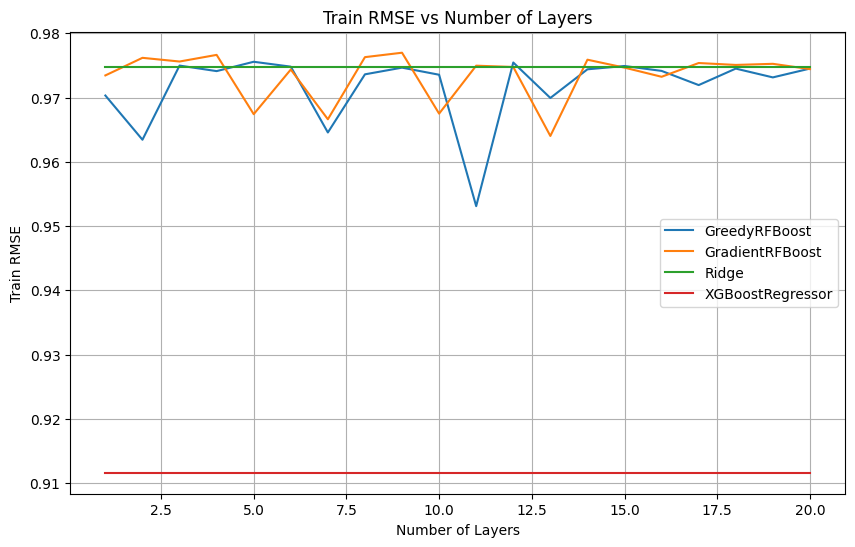

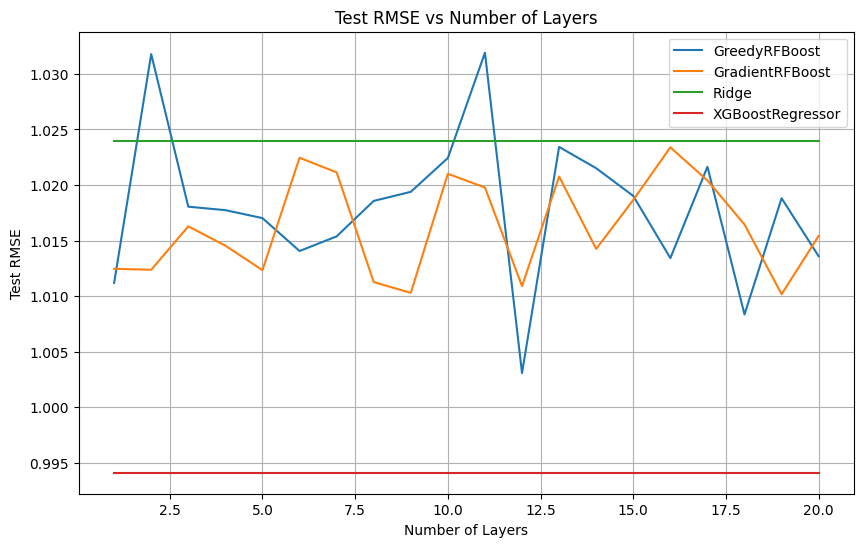

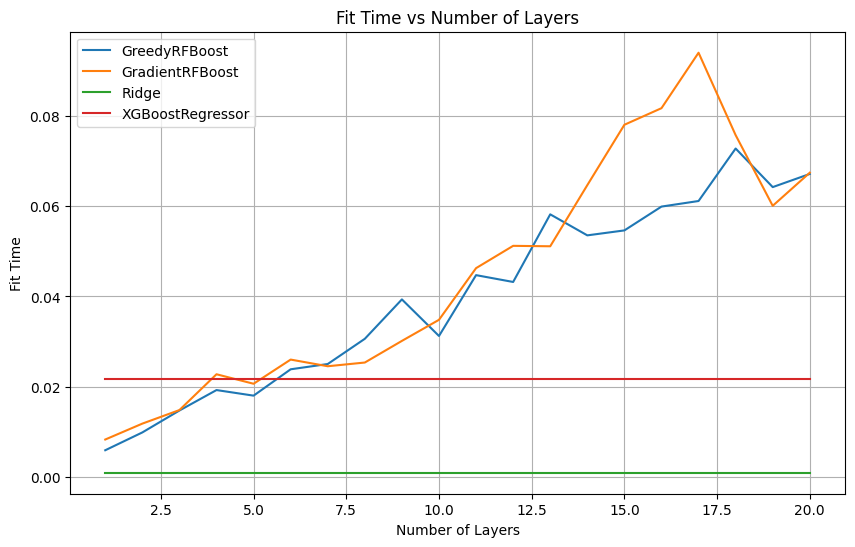

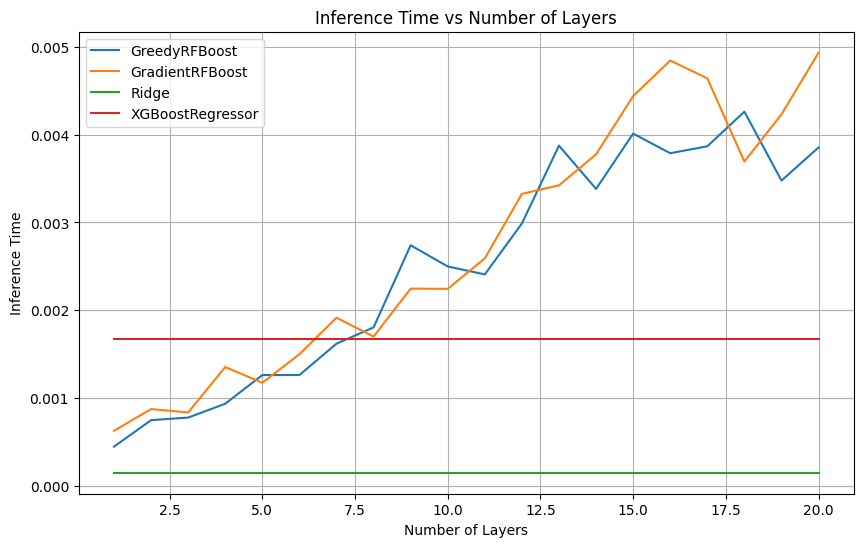

In [4]:
import json
import numpy as np
import os
from typing import List, Dict
import matplotlib.pyplot as plt

def load_json_into_dict(path: str)->dict:
    with open(path, 'r') as f:
        return json.load(f)


def join_jsons_into_array(
        max_T: int, 
        model_names: List[str], 
        dataset_name: str,
        save_dir: str = '/home/nikita/Code/random-feature-boosting/save/UCI/'
        ):
    all_results = []
    for model_name in model_names:
        t_results = []
        for t in range(1, max_T+1):
            new_model_name = model_name + f'_t{t}'
            path = os.path.join(save_dir, f'regression_{dataset_name}_{new_model_name}.json')
            results = load_json_into_dict(path)[dataset_name][new_model_name]
            results = np.stack([results["score_train"], results["score_test"], results["t_fit"], results["t_inference"]])
            t_results.append(results)

            if model_name in ["Ridge", "XGBoostRegressor"]:
                t_results.extend([results] * (max_T - 1))
                break
        all_results.append(t_results)

    return np.stack(all_results)


def plot_results():
    models = ["GreedyRFBoost", "GradientRFBoost", "Ridge", "XGBoostRegressor"]
    results = join_jsons_into_array(20, models, "forestfire")

    stds = np.std(results, axis=-1)
    results = np.mean(results, axis=-1)
    # results shape (n_models, n_layers, 4) where 4 is for
    # 0 - train, 1 - test, 2 - fit, 3 - inference
    results_train = results[..., 0]
    results_test = results[..., 1]
    results_fit = results[..., 2]
    results_inference = results[..., 3]

    for task, results in zip(["Train RMSE", "Test RMSE", "Fit Time", "Inference Time"], 
                             [results_train, results_test, results_fit, results_inference]):
        plt.figure(figsize=(10, 6))
        for i, model in enumerate(models):
            plt.plot(range(1, 21), results[i], label=model)

        plt.xlabel('Number of Layers')
        plt.ylabel(f'{task}')
        plt.title(f'{task} vs Number of Layers')
        plt.legend()
        plt.grid(True)
        plt.show()


plot_results()